In [2]:
import pandas as pd
df = pd.read_csv('D:/Hackathon/travistorrent_11_1_2017.csv/travistorrent_11_1_2017.csv', sep=',')

D:\Users\abbe_he\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3,6,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()


,tr_build_id,gh_project_name,gh_is_pr,gh_pr_created_at,gh_pull_req_num,gh_lang,git_merged_with,git_branch,gh_num_commits_in_push,gh_commits_in_push,...,tr_log_frameworks,tr_log_bool_tests_ran,tr_log_bool_tests_failed,tr_log_num_tests_ok,tr_log_num_tests_failed,tr_log_num_tests_run,tr_log_num_tests_skipped,tr_log_tests_failed,tr_log_testduration,tr_log_buildduration
0,106060,rails/rails,False,NaN,NaN,ruby,NaN,3-1-stable,NaN,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,106060,rails/rails,False,NaN,NaN,ruby,NaN,3-1-stable,NaN,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,106060,rails/rails,False,NaN,NaN,ruby,NaN,3-1-stable,NaN,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,106060,rails/rails,False,NaN,NaN,ruby,NaN,3-1-stable,NaN,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,106060,rails/rails,False,NaN,NaN,ruby,NaN,3-1-stable,NaN,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


      gh_lang  size
0        java   393
1  javascript     4
2        ruby   886


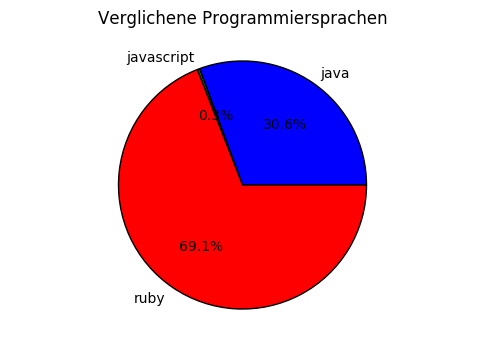

In [4]:
lang = df[['gh_lang', 'gh_project_name']]

dou = lang.drop_duplicates()
    
counts = dou.groupby('gh_lang').size().reset_index(name='size')
#counts.head()
print(counts)
#for e in df


import matplotlib.pyplot as pyplot
#ddf = counts.to_frame('size')


var= counts.stack()
temp = var.unstack()
type(temp)

x_list = temp['size']
label_list = temp['gh_lang']
pyplot.axis("equal") # Kreisdiagramm rund gestaltet (sonst Standard: oval!)#
pyplot.pie(x_list, labels=label_list, autopct="%1.1f%%")
pyplot.title('Verglichene Programmiersprachen')
pyplot.show()

In [75]:
def calculate(key):
    java_count = 0
    java_duration = 0
    ruby_count = 0
    ruby_duration = 0
    js_count = 0
    js_duration = 0
    for index, row in df.iterrows():
        if (str(row[key])=="nan"):
            continue
        if (row['gh_lang'] == 'java'):
            java_count += 1
            java_duration += row[key]
        elif (row['gh_lang'] == 'ruby'):
            ruby_count += 1
            ruby_duration += row[key]
        elif (row['gh_lang'] == 'javascript'):
            js_count += 1
            js_duration += row[key]
                                 
    java_e = java_duration/java_count
    ruby_e = ruby_duration/ruby_count
    js_e = js_duration/js_count

    d = {'language' : pd.Series(['java', 'ruby', 'js'], index=[0, 1, 2]), 'value' : pd.Series([java_e, ruby_e, js_e], index=[0, 1, 2])}
    dataset = pd.DataFrame(d)
    print(dataset)
    return dataset

  language        value
0     java  2197.305915
1     ruby  6866.300209
2       js   289.200219


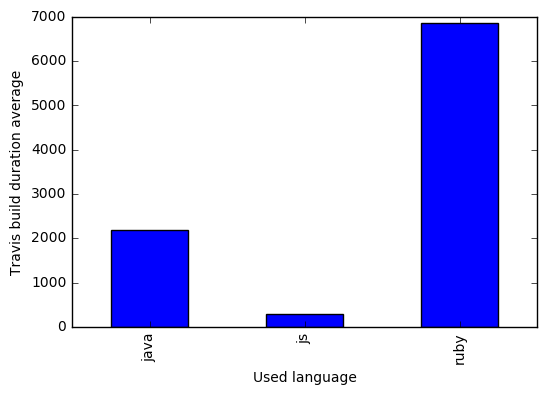

In [76]:
var = calculate('tr_duration').groupby('language').value.sum()
fig = pyplot.figure()
var.plot(kind='bar')
pyplot.ylabel("Travis build duration average")
pyplot.xlabel("Used language")
pyplot.show()

  language      value
0     java   8.321369
1     ruby   4.429921
2       js  16.284147


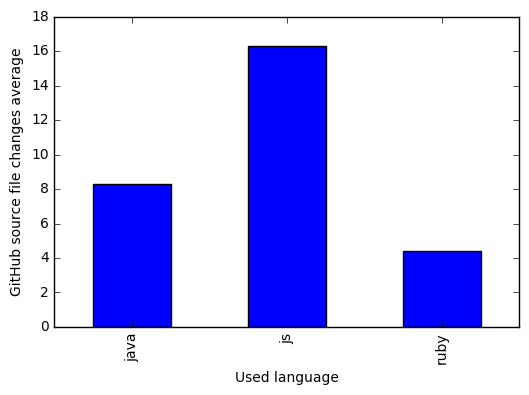

In [77]:
var = calculate('gh_diff_src_files').groupby('language').value.sum()
fig = pyplot.figure()
var.plot(kind='bar')
pyplot.ylabel("GitHub source file changes average")
pyplot.xlabel("Used language")
pyplot.show()

  language       value
0     java  269.761787
1     ruby   77.582976
2       js  522.103127


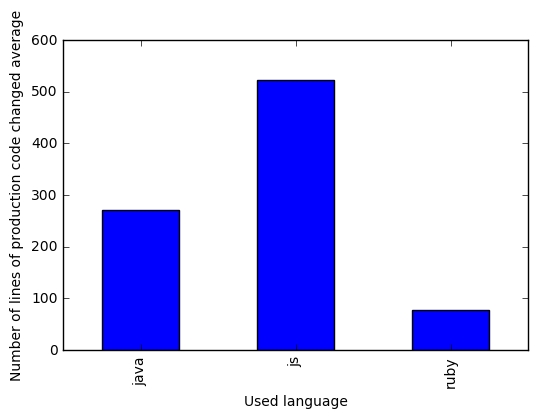

In [80]:
var = calculate('git_diff_src_churn').groupby('language').value.sum()
fig = pyplot.figure()
var.plot(kind='bar')
pyplot.ylabel("Number of lines of production code changed average")
pyplot.xlabel("Used language")
pyplot.show()

  language      value
0     java  12.247118
1     ruby  46.412146
2       js   8.573779


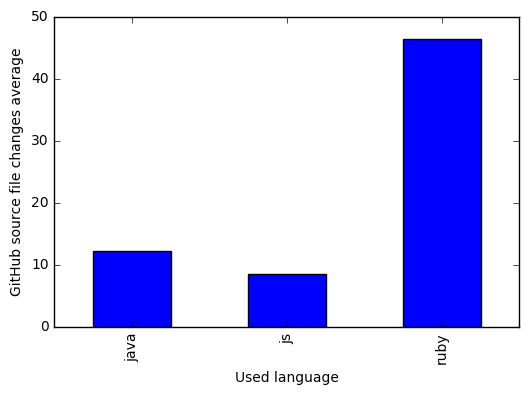

In [79]:
var = calculate('gh_team_size').groupby('language').value.sum()
fig = pyplot.figure()
var.plot(kind='bar')
pyplot.ylabel("GitHub team size average")
pyplot.xlabel("Used language")
pyplot.show()